<a href="https://colab.research.google.com/github/muratgorgl/Keras-Tensorflow-ile-Rakamlar-tan-ma-MNIST-Dataset/blob/main/MN%C4%B0ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


# Kurulum ve Kontroller


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12911457993737015713
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5922519157934650167
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

mkdir: cannot create directory ‘drive’: Operation not supported
/bin/bash: line 1: google-drive-ocamlfuse: command not found
MyDrive


In [4]:
!ls drive

ls: cannot access 'drive': No such file or directory


In [5]:
!ls

MyDrive


In [6]:
!pwd

/gdrive


In [7]:
%cd /gdrive

/gdrive


In [8]:
!ls


MyDrive


In [1]:
!pip install -q keras

# Uygulama Başlangıç

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

In [3]:
(x_train,y_train) , (x_test,y_test)=mnist.load_data()

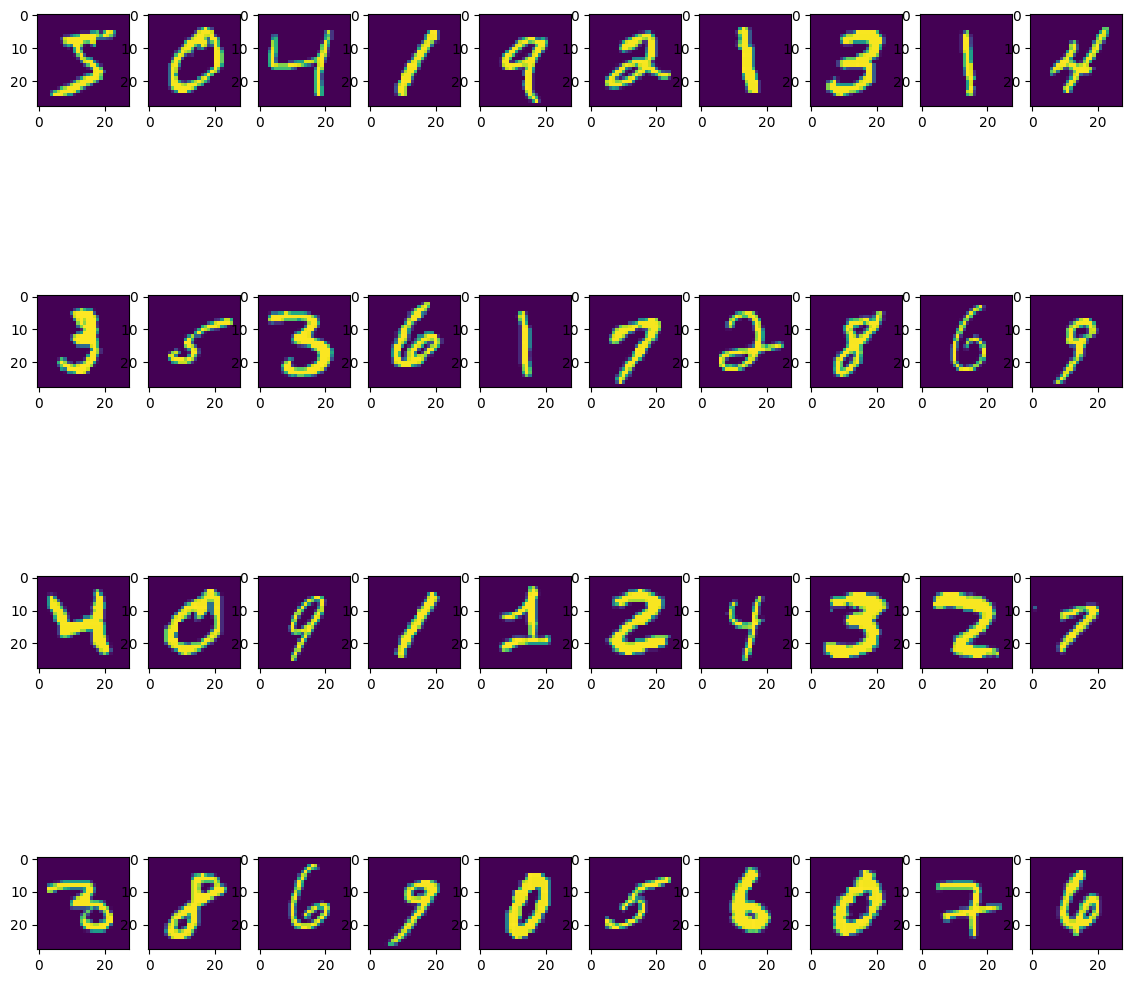

In [4]:
plt.figure(figsize=(14,14))
x , y = 10 , 4
for i in range(40):
  plt.subplot(y,x,i+1)
  plt.imshow(x_train[i])

plt.show()

In [5]:
# Eğitim için batch boyutu. Bu, her eğitim adımında modelin güncellenmeden önce kaç örneğin işleneceğini belirler.
batch_size = 128

# Veri kümesindeki sınıf sayısı. MNIST veri kümesi, 0'dan 9'a kadar 10 rakam içerir.
num_classes = 10

# Eğitilecek dönem sayısı. Bir dönem, tüm eğitim veri kümesinin model tarafından bir kez görülmesi anlamına gelir.
# Daha iyi doğruluk için 12 dönem önerilir, ancak burada hesaplama süresini kısaltmak için 5 kullanıyoruz.
epochs = 5

# Veri kümesindeki görüntülerin boyutları. MNIST görüntüleri 28x28 piksel boyutundadır.
img_rows, img_cols = 28, 28

# Keras tarafından kullanılan görüntü veri biçimini kontrol edin. Keras, "kanallar önce" (kanallar boyutu ilk gelir)
# veya "kanallar sonra" (kanallar boyutu son gelir) biçimlerini destekler.
if K.image_data_format() == "channels_first":
  # Verileri "kanallar önce" biçimine uyacak şekilde yeniden şekillendirin. Bu, her görüntüyü (örnek sayısı, kanallar, yükseklik, genişlik)
  # şeklinde bir 4 boyutlu diziye dönüştürür. MNIST görüntüleri gri tonlamalı olduğundan, kanal sayısı 1'dir.
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)

  # Model için giriş şeklini ayarlayın. Bu, modelin beklediği giriş verilerinin şeklini belirtir.
  input_shape = (img_rows, img_cols, 1)

In [6]:
# Eğitim etiketlerini kategorik formata dönüştürün.
# Bu, her etiketi 10 öğeli bir diziye dönüştürür, burada her öğe bir sınıfı temsil eder ve doğru sınıf için karşılık gelen öğe 1 olarak ayarlanır.
y_train=keras.utils.to_categorical(y_train,num_classes)

# Test etiketlerini kategorik formata dönüştürün.
# Bu, her etiketi 10 öğeli bir diziye dönüştürür, burada her öğe bir sınıfı temsil eder ve doğru sınıf için karşılık gelen öğe 1 olarak ayarlanır.
y_test=keras.utils.to_categorical(y_test,num_classes)

# Model Oluşturma


In [7]:
model=Sequential()

input_shape=(28,28,1)
# İlk Convolutional katmanı
# 32 adet filtre kullanılarak, 3x3 boyutlarında kernel uygulanacak
# Aktivasyon fonksiyonu olarak ReLU (Rectified Linear Unit) kullanılıyor
# input_shape parametresi, giriş verisinin boyutlarını belirtir (örneğin, 28x28x1)
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))

# İkinci Convolutional katmanı
# 64 adet filtre kullanılarak, yine 3x3 boyutlarında kernel uygulanacak
# Aktivasyon fonksiyonu olarak yine ReLU kullanılıyor
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))

# MaxPooling katmanı
# 2x2 boyutlarında pencereler kullanılarak Max Pooling uygulanacak
# Bu katman, özellik haritalarının boyutlarını yarıya indirir ve modelin hesaplama yükünü azaltır
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout katmanı
# Overfitting'i önlemek için, bir oran (0.25) ile belirli nöronları rastgele devre dışı bırakır
# Eğitim sırasında belirtilen oranda nöronları sıfırlayarak, modelin genelleme yeteneğini artırır
model.add(Dropout(0.25))

# Flatten katmanı
# Convolutional ve MaxPooling katmanlarının çıktılarını tek boyutlu bir vektöre dönüştürür
# Dense (tam bağlantılı) katmanlar için giriş verisini hazırlar
model.add(Flatten())

# Dense (Tam Bağlantılı) katmanı
# 128 nöron içeren tam bağlantılı katman
# Aktivasyon fonksiyonu olarak ReLU kullanılıyor
# Bu katman, öğrenilen özellikleri daha yüksek seviyeli özellikler haline getirir
model.add(Dense(128, activation="relu"))

# Dropout katmanı
# Tekrar overfitting'i önlemek için, daha yüksek bir oran (0.50) ile belirli nöronları rastgele devre dışı bırakır
# Bu katman, eğitim sırasında modelin genelleme yeteneğini daha da artırır
model.add(Dropout(0.50))

# Çıkış katmanı
# Sınıflandırma problemi için softmax aktivasyon fonksiyonu kullanılarak sınıf olasılıklarını hesaplar
# num_classes, sınıf sayısını belirtir (örneğin, 10 sınıf için num_classes = 10)
model.add(Dense(num_classes, activation="softmax"))


#Model Görselleştirme

In [8]:
# Model Özeti

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [42]:
# Modeli derlemek (compile) için kullanılan fonksiyon
# Bu, modelin nasıl optimize edileceğini, kayıp fonksiyonunun ne olduğunu ve hangi metriklerin değerlendirileceğini belirler
model.compile(
    # Kayıp fonksiyonu olarak categorical_crossentropy kullanılıyor
    # Bu kayıp fonksiyonu, sınıflandırma problemleri için yaygın olarak kullanılır
    # One-hot encoded etiketler ve modelin tahminleri arasındaki farkı hesaplar
    loss=keras.losses.categorical_crossentropy,

    # Optimizasyon algoritması olarak Adadelta kullanılıyor
    # Adadelta, öğrenme oranını dinamik olarak ayarlayan bir adaptif öğrenme oranı yöntemidir
    # Öğrenme oranını manuel olarak ayarlama gereksinimini ortadan kaldırır
    optimizer=keras.optimizers.Adadelta(),

    # Eğitim sürecinde izlenecek metrikler
    # accuracy metriği, modelin tahminlerinin doğruluğunu değerlendirir
    # Eğitim ve doğrulama süreçlerinde doğruluk metriği raporlanacak
    metrics=["accuracy"]
)


#Eğitim İşlemleri

In [43]:
# Modeli eğitmek için kullanılan fonksiyon
# Bu fonksiyon, modelin eğitim verileri üzerinde öğrenmesini sağlar ve modelin performansını değerlendirir
model.fit(
    # Eğitim verileri
    # x_train: Modelin öğrenmesi için kullanılan giriş verileri
    # y_train: x_train verilerine karşılık gelen etiketler (target values)
    x_train,
    y_train,

    # Batch size (parti boyutu)
    # Her bir adımda işlenecek veri örneği sayısıdır
    # Büyük batch size'lar daha fazla bellek tüketir, küçük batch size'lar ise daha az bellek tüketir
    # Bu örnekte batch_size, modelin bir seferde kaç örnek işleyeceğini belirler
    batch_size=batch_size,

    # Epoch sayısı
    # Modelin tüm eğitim verilerini kaç kez tekrar edeceğini belirtir
    # Her epoch'ta model tüm eğitim verilerini bir kez işleyip günceller
    # Epoch sayısını artırmak, modelin daha fazla öğrenmesini sağlar, ancak aşırı uyum (overfitting) riskini de artırır
    epochs=epochs,

    # Verbose (ayrıntı seviyesi)
    # Eğitim sürecinde modelin durumunu ne kadar ayrıntılı göstereceğini belirler
    # verbose=1, eğitim sürecinde her epoch'un ilerlemesini gösterir
    # verbose=2, her epoch sonunda detaylı bir rapor sağlar
    # verbose=0, eğitim sürecini hiç göstermez
    verbose=1,

    # Doğrulama verileri
    # Modelin eğitim sürecinde doğrulama performansını değerlendirmek için kullanılan veriler
    # validation_data parametresi, eğitim sürecinde modelin doğrulama verileri üzerinde de test edilmesini sağlar
    # Bu sayede, modelin doğruluk ve kayıp değerleri hem eğitim hem de doğrulama veri setleri üzerinde izlenebilir
    validation_data=(x_test, y_test)
)


Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 1.4978 - accuracy: 0.5242 - val_loss: 0.9743 - val_accuracy: 0.7164
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 1.4515 - accuracy: 0.5396 - val_loss: 0.9348 - val_accuracy: 0.7263
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 1.4333 - accuracy: 0.5480 - val_loss: 0.9108 - val_accuracy: 0.7332
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 1.3962 - accuracy: 0.5564 - val_loss: 0.8759 - val_accuracy: 0.7406
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 1.3717 - accuracy: 0.5638 - val_loss: 0.8529 - val_accuracy: 0.7473


In [44]:
model.save("save_model/mnist_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
# Modeli test verileri üzerinde değerlendirmek için kullanılan fonksiyon
# Bu fonksiyon, modelin test veri setindeki performansını ölçer
# Test verileri üzerinde modelin kayıp ve doğruluk gibi metriklerini hesaplar
score = model.evaluate(
    # Test verileri
    # x_test: Modelin test sürecinde değerlendirilmek üzere kullanılan giriş verileri
    # y_test: x_test verilerine karşılık gelen gerçek etiketler
    x_test,
    y_test,

    # Verbose (ayrıntı seviyesi)
    # Eğitim sürecinde olduğu gibi, evaluate fonksiyonu da verbose parametresi alabilir
    # verbose=0, değerlendirme sürecinin detaylarını göstermeden sadece sonuçları döner
    # verbose=1, değerlendirme sürecinde ilerlemeyi gösterir (genellikle eğitim sürecinde verbose=1 veya verbose=2 kullanılır)
    verbose=0
)

# Modelin test verileri üzerindeki kayıp değerini yazdırır
# score[0], test veri setindeki kayıp değerini içerir
print("Test Loss:", score[0])

# Modelin test verileri üzerindeki doğruluk değerini yazdırır
# score[1], test veri setindeki doğruluk değerini içerir
print("Test Accuracy:", score[1])


Test Loss: 1.0188952684402466
Test Accuracy: 0.7060999870300293


In [45]:
# Test veri setinden 5. indeksteki görüntüyü seçer
# Bu görüntü, modelin test aşamasında değerlendirilmek üzere kullanılan bir örnektir
# test_image değişkeni, bu görüntüyü temsil eder ve modelin tahminleriyle karşılaştırmak için kullanılabilir
test_image = x_test[5]

# Test veri setinden 5. indeksteki etiket değerini seçer
# Bu etiket, x_test[5] görüntüsüne karşılık gelen gerçek sınıf etiketidir
# y_test[5] değeri, modelin tahminleri ile karşılaştırmak için kullanılan doğru sınıf etiketini içerir
y_test[5]


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

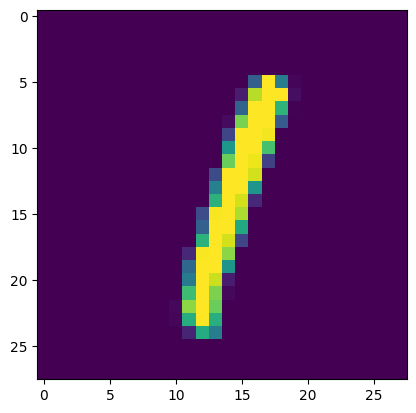

In [46]:
# test_image değişkenindeki görüntüyü 28x28 boyutunda yeniden şekillendirip görselleştirir
# .reshape(28, 28) metodu, görüntüyü 28x28 piksel boyutuna dönüştürür
# Bu, genellikle gri tonlamalı (grayscale) görüntüler için kullanılan bir boyuttur
# Görselleştirmek için matplotlib kütüphanesinin imshow fonksiyonu kullanılır
# Bu fonksiyon, görüntüyü ekran üzerinde gösterir
plt.imshow(test_image.reshape(28, 28))

# cmap='gray' parametresi, görüntünün gri tonlamalı olarak gösterilmesini sağlar
# Renkli (RGB) görüntülerde bu parametreye ihtiyaç duyulmaz, ancak gri tonlamalı görüntülerde bu parametre görüntünün doğru renklerde görünmesini sağlar
# Bu satır, modelin test verilerinden seçilen örneği görsel olarak incelemek için kullanılır


In [47]:
# x_test veri setinden 128. indeksteki görüntüyü seçer ve yeniden şekillendirir
# .reshape(1, 28, 28, 1) metodu, bu görüntüyü (28, 28) boyutundan 4D bir diziye dönüştürür
# İlk boyut (1), modelin tek bir örneği işlemesi için gerekli batch boyutunu belirtir
# Son boyut (1), gri tonlamalı (grayscale) bir görüntüyü temsil eder; renkli (RGB) görüntülerde bu değer 3 olurdu
# Bu yeniden şekillendirme, modelin beklediği giriş formatına uygun hale getirir
test_data = x_test[128].reshape(1, 28, 28, 1)

# Modeli kullanarak test_data üzerindeki tahminleri yapar
# predict fonksiyonu, verilen giriş verileri için modelin tahminlerini döndürür
# batch_size=1 parametresi, modelin bir seferde sadece bir örneği işlemesini belirtir
# Bu, modelin test_data'ya karşılık gelen sınıf olasılıklarını döndürür
pre = model.predict(test_data, batch_size=1)


1/1 [==============================] - 0s 66ms/step


In [48]:
import numpy as np

# Test verileri üzerinde modelin tahminlerini yapar ve sınıf etiketlerini belirler
# model.predict(test_data) fonksiyonu, test_data için modelin tahminlerini döndürür
# np.argmax, tahmin edilen olasılıkların en yüksek olduğu sınıfı bulur
# axis=-1 parametresi, son eksende (sınıf boyutunda) maksimum değeri arar
# predicted_class, modelin test_data için tahmin ettiği sınıf etiketini içerir
predicted_class = np.argmax(model.predict(test_data), axis=-1)
print("Predicted Class:", predicted_class)

# Test verileri için modelin tahmin ettiği her sınıfın olasılıklarını alır
# model.predict(test_data) fonksiyonu, her sınıf için tahmin edilen olasılıkları döndürür
# predicted_probabilities, test_data'nın her sınıf için tahmin edilen olasılıklarını içerir
predicted_probabilities = model.predict(test_data)
print("Predicted Probabilities:", predicted_probabilities)

print("-------------------------------------------------")

# Test verileri üzerinde modelin tahmin ettiği olasılıkları tekrar alır
# Bu, önceki kodla aynı işlevi görür ancak burada ek bir işlem yapılacaktır
prob = model.predict(test_data)

# Olasılıkları sınıf etiketlerine dönüştürür
# np.argmax, her sınıf için tahmin edilen olasılıkların en yüksek olduğu sınıfı bulur
# axis=1 parametresi, ikinci eksende (sınıf boyutunda) maksimum değeri arar
# preds, test_data için tahmin edilen sınıf etiketlerini içerir
preds = np.argmax(prob, axis=1)

# Tahmin edilen sınıf etiketlerini ve her sınıf için tahmin edilen olasılıkları yazdırır
print(preds, prob)


1/1 [==============================] - 0s 66ms/step
Predicted Class: [3]
1/1 [==============================] - 0s 20ms/step
Predicted Probabilities: [[0.09611696 0.08793248 0.10827096 0.11411392 0.09361245 0.10845862
  0.09405132 0.08844816 0.1110772  0.09791795]]
-------------------------------------------------
1/1 [==============================] - 0s 18ms/step
[3] [[0.09611696 0.08793248 0.10827096 0.11411392 0.09361245 0.10845862
  0.09405132 0.08844816 0.1110772  0.09791795]]
